# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

sns.set(style='whitegrid', font_scale=1.3, palette='Set3')
%matplotlib inline




### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [2]:
data = pd.read_csv('train.csv')

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [3]:
r_index = np.random.permutation(data.index)
training_size = int(0.7 * len(r_index))
training_index = r_index[:training_size]
test_index = r_index[training_size:]
training_data = data.loc[training_index]
test_data = data.loc[test_index]

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [49]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [5]:
get_features_and_target(training_data)
get_features_and_target(test_data)

(     Pclass     Sex   Age  SibSp  Parch      Fare
 742       1  female  21.0      2      2  262.3750
 136       1  female  19.0      0      2   26.2833
 68        3  female  17.0      4      2    7.9250
 864       2    male  24.0      0      0   13.0000
 886       2    male  27.0      0      0   13.0000
 ..      ...     ...   ...    ...    ...       ...
 183       2    male   1.0      2      1   39.0000
 611       3    male   NaN      0      0    7.0500
 833       3    male  23.0      0      0    7.8542
 695       2    male  52.0      0      0   13.5000
 430       1    male  28.0      0      0   26.5500
 
 [268 rows x 6 columns], 742    1
 136    1
 68     1
 864    0
 886    0
       ..
 183    1
 611    0
 833    0
 695    0
 430    1
 Name: Survived, Length: 268, dtype: int64)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

In [ ]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0,1,1,F.C.C. 13529,26.2500,NaN,S
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S


In [ ]:
training_data.describe().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,623.000,623.000,623.000,498.000,623.000,623.000,623.000
mean,440.350,0.395,2.308,29.668,0.533,0.363,32.153
std,258.668,0.489,0.832,14.943,1.135,0.761,49.152
min,1.000,0.000,1.000,0.420,0.000,0.000,0.000
25%,216.500,0.000,2.000,20.000,0.000,0.000,7.925
50%,433.000,0.000,3.000,28.000,0.000,0.000,14.500
75%,660.500,1.000,3.000,38.000,1.000,0.000,31.275
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 107 to 380
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          498 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        140 non-null    object 
 11  Embarked     621 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


In [ ]:
training_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            125
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          483
Embarked         2
dtype: int64

У 123 человек не записан возраст. Значит известен возраст 500 пассажиров.
Также неизвестно у 482 значение кабины, не задан 1 порт отправления. По остальным признакам обучающие данные полны.

Можно вывести в % сколько пассажиров выжило и не выжило

Количество выживших:246    Количество невыживших:645
Процент выживших:27.61%    Процент невыживших:72.39%


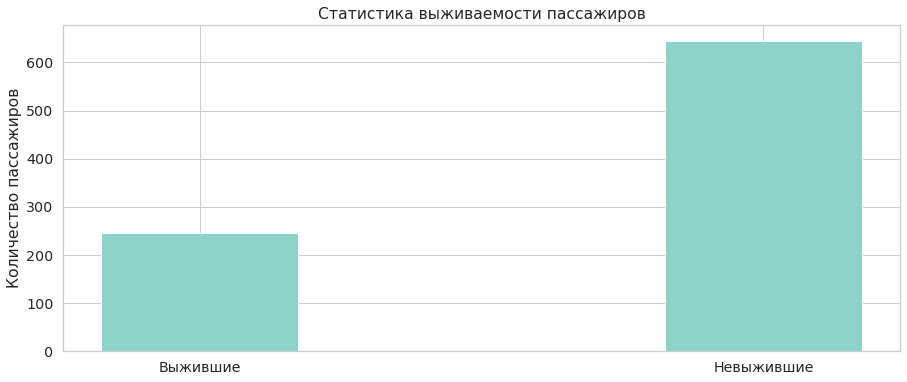

In [ ]:
surv_count = (training_data['Survived'] == 1).sum()
all = data['PassengerId'].count()
procent_surv = (surv_count / all * 100).round(2)
nsurv_count = all - surv_count
nsurv_procent = (nsurv_count / all * 100).round(2)
print('Количество выживших:' + str(surv_count) + '    ' + 'Количество невыживших:' + str(nsurv_count))
print('Процент выживших:'+ str(procent_surv) + '%' + '    ' + 'Процент невыживших:' + str(nsurv_procent) + '%')

plt.figure(figsize=(15,6))
bar_width = 0.35
plt.bar(['Выжившие', 'Невыжившие'], [surv_count, nsurv_count], width=bar_width)
plt.ylabel('Количество пассажиров')
plt.title('Статистика выживаемости пассажиров');

В обучающей выборке из 891 пассажиров выжило 246(27.61%) и 645(72.39%), почти в 3 раза больше невыживших.

Всего male:577                 Всего female:314
Количество выживших male:79    Количество выживших female:167
Процент выживших male:8.87%    Процент выживших female:18.74%


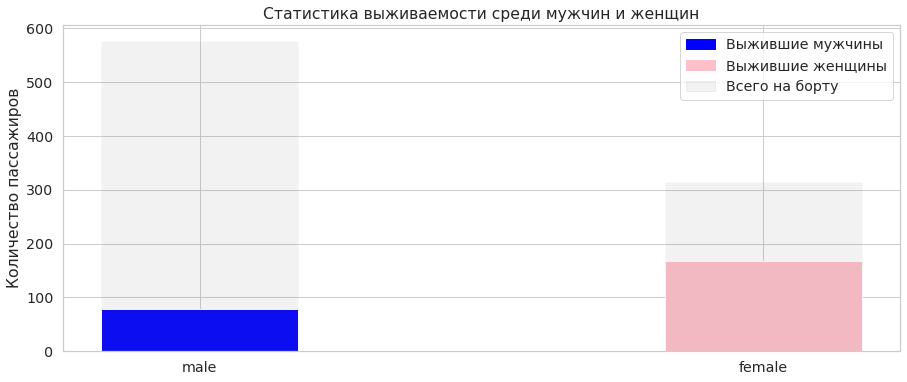

In [ ]:

survived = training_data[training_data['Survived'] == 1]
male = (data['Sex']== 'male').sum()
female = (data['Sex']== 'female').sum()

male_s = survived[survived['Sex'] == 'male'].shape[0]
female_s = survived[survived['Sex'] == 'female'].shape[0]

procent_male = (male_s / all * 100).round(2)
procent_female = (female_s / all * 100).round(2)

print('Всего male:' + str(male) + '                 ' + 'Всего female:' + str(female))
print('Количество выживших male:' + str(male_s) + '    ' + 'Количество выживших female:' + str(female_s))
print('Процент выживших male:'+ str(procent_male) + '%' + '    ' + 'Процент выживших female:' + str(procent_female) + '%')

plt.figure(figsize=(15,6))
plt.bar(['male', 'female'], [male_s, female_s], width=0.35, color=['blue', 'pink'])
plt.bar(['male', 'female'], [male, female], width=0.35, alpha=0.1, color=['grey', 'grey'])
plt.ylabel('Количество пассажиров')
plt.title('Статистика выживаемости среди мужчин и женщин')
blue_patch = mpatches.Patch(color='blue', label='Выжившие мужчины')
pink_patch = mpatches.Patch(color='pink', label='Выжившие женщины')
grey_patch = mpatches.Patch(color='grey', alpha=0.1, label='Всего на борту')
plt.legend(handles=[blue_patch, pink_patch, grey_patch]);

По диаграмме видно, что, не смотря на то, что мужчин больше, выживших средни них в 2 раза меньше, чем женщин. У женщин противоположная ситуация. ~50% спасенных женщин, что объясняется тем, что спасали больше всего женщин и детей.

Всего пассажиров в 1-м классе: 149
Количество выживших пассажиров в 1-м классе: 95
выживших пассажиров в 1-м классе: 63.76%

Всего пассажиров в 2-м классе: 133
Количество выживших пассажиров в 2-м классе: 66
выживших пассажиров в 2-м классе: 49.62%

Всего пассажиров в 3-м классе: 341
Количество выживших пассажиров в 3-м классе: 85
выживших пассажиров в 3-м классе: 24.93%



Text(0.5, 1.0, 'Статистика выживаемости среди разных классов')

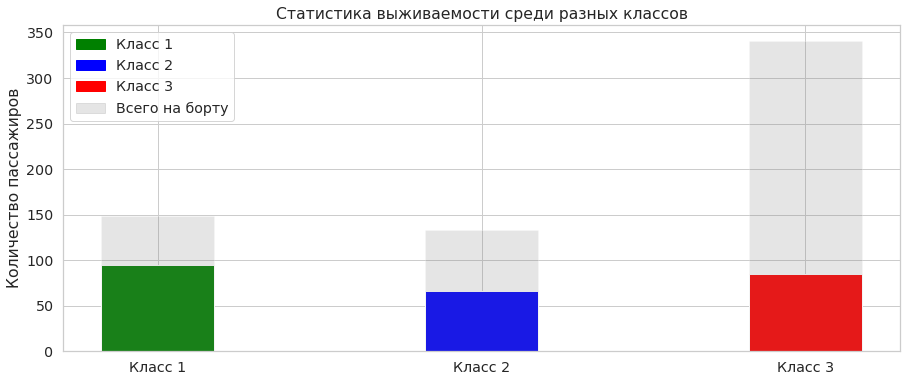

In [ ]:
pclass = training_data.groupby('Pclass')
pclass_count = pclass.size()
pclass_survived_count = pclass['Survived'].sum()
procent_surv = (pclass_survived_count / pclass_count * 100).round(2)

len = training_data['Pclass'].nunique()
for i in range(len):
  print(f'Всего пассажиров в {i+1}-м классе: {pclass_count.iloc[i]}')
  print(f'Количество выживших пассажиров в {i+1}-м классе: {pclass_survived_count.iloc[i]}')
  print(f'выживших пассажиров в {i+1}-м классе: {procent_surv.iloc[i]}%')
  print()

plt.figure(figsize=(15,6))
for i in range(len):
  plt.bar([f'Класс {i+1}'], pclass_survived_count.iloc[i], width=0.35, color=['green', 'blue', 'red'][i])
  plt.bar([f'Класс {i+1}'], pclass_count.iloc[i], width=0.35, alpha=0.2, color='grey')
  
green_patch = mpatches.Patch(color='green', label='Класс 1')
blue_patch = mpatches.Patch(color='blue', label='Класс 2')
red_patch = mpatches.Patch(color='red', label='Класс 3')
grey_patch = mpatches.Patch(color='grey', alpha=0.2, label='Всего на борту')
plt.legend(handles=[green_patch, blue_patch, red_patch, grey_patch])

plt.ylabel('Количество пассажиров')
plt.title('Статистика выживаемости среди разных классов')

Больше всего человек погибло из 3го класса, меьше 2го и 1го соответственно. Отсюда можно сделать вывод, что многие из 3го класса могли не успеть спастись, так как находились в нижней части корабля, 1й класс наооборот, имел больше шансов спастись.

Количество male в 1-м классе : 80
Количество female в 1-м классе : 69
Количество выживших male в 1-м классе: 28
Количество выживших female в 1-м классе: 67
выживших male в 1-м классе: 35.0%
выживших female в 1-м классе: 97.1%

Количество male в 2-м классе : 78
Количество female в 2-м классе : 55
Количество выживших male в 2-м классе: 14
Количество выживших female в 2-м классе: 52
выживших male в 2-м классе: 17.95%
выживших female в 2-м классе: 94.55%

Количество male в 3-м классе : 239
Количество female в 3-м классе : 102
Количество выживших male в 3-м классе: 37
Количество выживших female в 3-м классе: 48
выживших male в 3-м классе: 15.48%
выживших female в 3-м классе: 47.06%



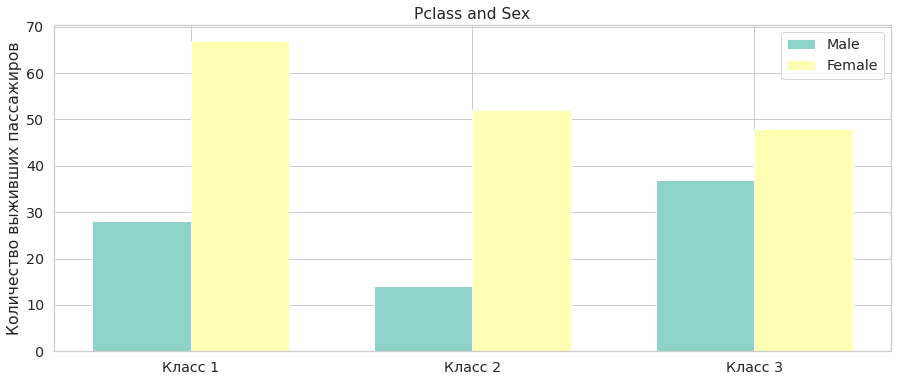

In [ ]:
m = training_data[training_data['Sex'] == 'male']
f = training_data[training_data['Sex'] == 'female']
m_pclass = m.groupby('Pclass')
f_pclass = f.groupby('Pclass')

m_pclass_count = m_pclass.size()
f_pclass_count= f_pclass.size()

m_pcl_surv = m_pclass['Survived'].sum()
f_pcl_surv = f_pclass['Survived'].sum()

m_pr_surv = (m_pcl_surv / m_pclass_count *100).round(2)
f_pr_surv = (f_pcl_surv / f_pclass_count *100).round(2)

len = training_data['Pclass'].nunique()
for i in range(len):
  print(f'Количество male в {i+1}-м классе : {m_pclass_count.iloc[i]}')
  print(f'Количество female в {i+1}-м классе : {f_pclass_count.iloc[i]}')
  print(f'Количество выживших male в {i+1}-м классе: {m_pcl_surv.iloc[i]}')
  print(f'Количество выживших female в {i+1}-м классе: {f_pcl_surv.iloc[i]}')
  print(f'выживших male в {i+1}-м классе: {m_pr_surv.iloc[i]}%')
  print(f'выживших female в {i+1}-м классе: {f_pr_surv.iloc[i]}%')
  print()

len = training_data['Pclass'].nunique()
class_nums = range(len)
bar_width = 0.35

male_bar_positions = np.array(class_nums) - bar_width / 2
female_bar_positions = np.array(class_nums) + bar_width / 2

fig, ax = plt.subplots(figsize=(15, 6))
male_bars = ax.bar(male_bar_positions, m_pcl_surv, width=bar_width, label='Male')
female_bars = ax.bar(female_bar_positions, f_pcl_surv, width=bar_width, label='Female')

ax.set_ylabel('Количество выживших пассажиров')
ax.set_title('Pclass and Sex')
ax.set_xticks(class_nums)
ax.set_xticklabels(['Класс {}'.format(c+1) for c in class_nums])
ax.legend();


Глядя на диаграммы, можно точно сказать, что независимо от класса больше шансов спастись у женщин. Больше всего выжило женщин из 1го класса, меньше всего выжило мужчин 2го класса. Еще одной возможной причиной, почему женщин больше среди выживших, так как многие мужчинв оставались помогать до последнего, закидывая в лодки женщин и детей.

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**
Если класс пассажира 1й, то вероятность выживания 64%, если класс пассажира >= 2.5 и пол пассажира женский, то вероятность выживания 70% 


**Дерево 2:**

Если пол пассажира женский, то вероятность на выживание в 2 раза выше. Иначе вероятность на выживание в 2 раза ниже.

Реализуйте полученные деревья по шаблону

In [45]:
def tree1(features):
  predictions = []
  for _, row in features.iterrows():
    if row['Pclass'] == 1:
      predictions.append(1)
    elif row['Sex'] == 'female' and row['Pclass'] >= 2.5:
      predictions.append(1)
    else:
      predictions.append(0)
  return pd.Series(predictions, index=features.index)


def tree2(features):
  predictions = []
  for _, row in features.iterrows():
    if row['Sex'] == 'female':
      predictions.append(1)
    else:
      predictions.append(0)
  return pd.Series(predictions, index=features.index)


#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**
Количество совпадений моего дерева с эталоном/всего количество прогнозов

Реализуйте данный критерий по шаблону

In [10]:
def criteria(target, predicted):
    all = len(target)
    my = sum(np.array(target) == np.array(predicted))
    return my / all
    

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [46]:

criteria(test_data['Survived'], tree1(test_data))

0.6604477611940298

In [39]:
criteria(test_data['Survived'], tree2(test_data))

0.7425373134328358

**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [50]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    
    return predicted

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

#### 6. Выводы

1. Выживаемость сильно зависит от пола, далее зависит от класса
2.Второе дерево показываеи результат лучше, так как в первом дереве все, кто не первый клас, не женщина и не первый класс не выживают. Это верно не во всех случаях, так как женщины независимо от класса больше выживали, поэтому второе дерево имеет выше результат

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
business = pd.read_csv('yelp_business.csv')
business.head()

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
big_c = business.groupby('city').count().sort_values(by='name', ascending=False).reset_index('city').head(5)[['city', 'name']]
big_c

,city,name
0,Las Vegas,26775
1,Phoenix,17213
2,Toronto,17206
3,Charlotte,8553
4,Scottsdale,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

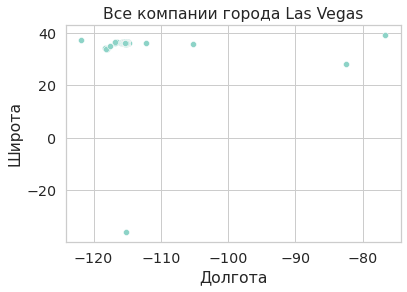

In [ ]:
big_bus_city = big_c.iloc(0)[0]['city']
array = business[business['city'] == big_bus_city]
ax = sns.scatterplot(x='longitude', y='latitude', data=array)
ax.set_ylabel('Широта')
ax.set_xlabel('Долгота')
ax.set_title(f'Все компании города {big_bus_city}');

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

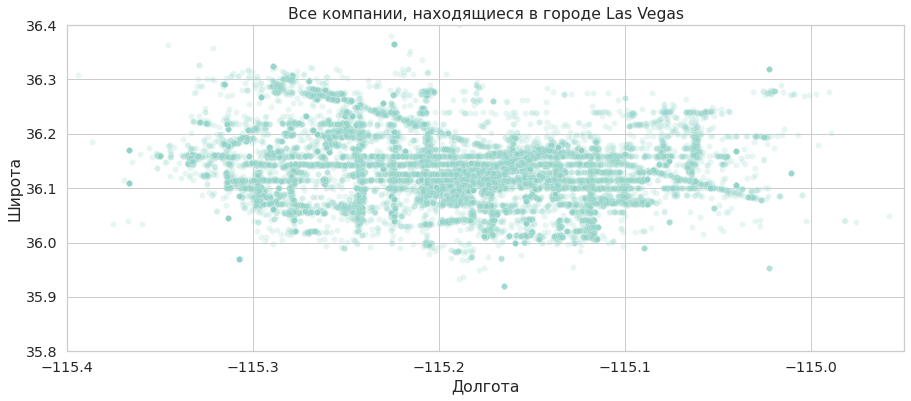

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x='longitude', y='latitude', data=array, alpha=0.2)
ax.set_xlim(-115.4,-114.95)
ax.set_ylim(35.8,36.4)
ax.set_ylabel('Широта')
ax.set_xlabel('Долгота')
ax.set_title(f'Все компании, находящиеся в городе {big_bus_city}');

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [ ]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
array1 = business[(business['city'] == big_bus_city) & 
                 (business['longitude'] >= -115.4) & (business['longitude'] <= -114.95) & 
                 (business['latitude'] >= 35.8) & (business['latitude'] <= 36.4)]

fig = px.density_mapbox(
    array1,  # таблица с данными
    lat='latitude', lon='longitude',  # колонки с координатами
    radius=10,  # радиус влияния каждой точки
    mapbox_style="stamen-terrain"  # стиль карты
)
plotly.offline.plot(fig, filename='correct_map.html', auto_open=False)

'correct_map.html'

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
review = pd.read_csv('yelp_review.csv')
review.head()

,Unnamed: 0,business_id,stars
0,0,AEx2SYEUJmTxVVB18LlCwA,5
1,1,VR6GpWIda3SfvPC-lg9H3w,5
2,2,CKC0-MOWMqoeWf6s-szl8g,5
3,3,ACFtxLv8pGrrxMm6EgjreA,4
4,4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
review_N = pd.merge(review, array['business_id'], on=['business_id'], how='inner')
review_N

,Unnamed: 0,business_id,stars
0,5,8QWPlVQ6D-OExqXoaD2Z1g,5
1,16786,8QWPlVQ6D-OExqXoaD2Z1g,4
2,197712,8QWPlVQ6D-OExqXoaD2Z1g,5
3,292022,8QWPlVQ6D-OExqXoaD2Z1g,5
4,351244,8QWPlVQ6D-OExqXoaD2Z1g,5
...,...,...,...
710618,2308111,C1QKUc9VOKkc0WyEUCKS4A,5
710619,2308831,Z6isYod9RRirIsbUte-rLw,1
710620,2309863,CzTgd25BHYrB9XEdMiQb3g,4
710621,2312632,gq2FRYTgxPUalyPtN2tVMw,3


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
review_N1 = review_N.groupby('business_id').aggregate([np.mean, np.size])['stars']
review_N1

,mean,size
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.079341,668
--DdmeR16TRb3LsjG0ejrQ,3.000000,4
--WsruI0IGEoeRmkErU5Gg,4.857143,7
--Y7NhBKzLTbNliMUX_wfg,4.666667,3
--e8PjCNhEz32pprnPhCwQ,4.000000,8
...,...,...
zzO9QVUj-XvZ8trNX2lqAg,4.800000,5
zzOo9n22fBbKAhbSpMzggA,3.307692,13
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,1


Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
review_N1.columns = ['Средняя оценка компании', 'Количество оценок']
review_N1.reset_index()

,business_id,Средняя оценка компании,Количество оценок
0,--9e1ONYQuAa-CB_Rrw7Tw,4.079341,668
1,--DdmeR16TRb3LsjG0ejrQ,3.000000,4
2,--WsruI0IGEoeRmkErU5Gg,4.857143,7
3,--Y7NhBKzLTbNliMUX_wfg,4.666667,3
4,--e8PjCNhEz32pprnPhCwQ,4.000000,8
...,...,...,...
25759,zzO9QVUj-XvZ8trNX2lqAg,4.800000,5
25760,zzOo9n22fBbKAhbSpMzggA,3.307692,13
25761,zzXuJF6UUT1kgTyCsmgDmQ,5.000000,1
25762,zzsKbL1KMNJqazSqBXskxQ,3.666667,3



Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
array = business[business['city'] == big_bus_city]
array = array.set_index('business_id')
new_array = array.join(review_N1, how='inner')
new_array = new_array.loc[:, ['latitude', 'longitude', 'categories', 'name', 'Средняя оценка компании', 'Количество оценок']]
new_array

,latitude,longitude,categories,name,Средняя оценка компании,Количество оценок
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",3.333333,3
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.200000,5
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.909091,11
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.200000,10
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.750000,12
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,36.134355,-115.224462,Real Estate Services;Home Services;Property Ma...,"""Stonegate Real Estate Services""",5.000000,9
pUhU5ohYv65g8B47dTXAKA,36.173589,-115.116779,Coffee & Tea;Food,"""Starbucks""",2.562500,16
sH9WsMj8sNTTSAUWv4UEEg,36.055130,-115.243488,Mobile Phone Accessories;Mobile Phones;Electro...,"""Sprint Store""",4.066667,15


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

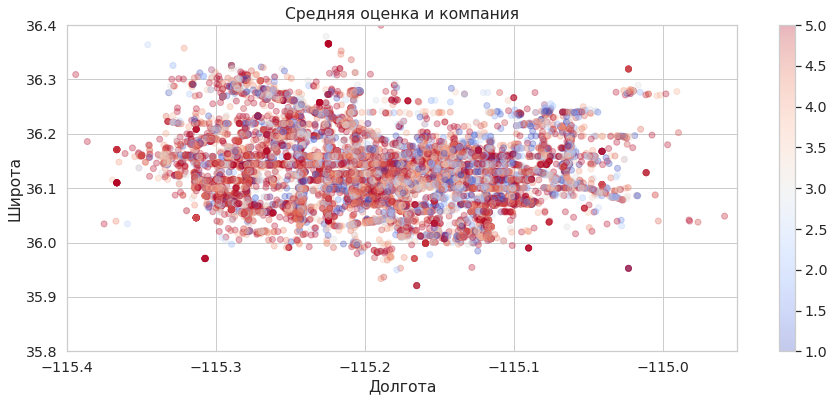

In [ ]:
figure, ax = plt.subplots(figsize=(15,6))

longitude	= new_array['longitude']
latitude = new_array['latitude']
raiting = new_array['Средняя оценка компании']

gr = ax.scatter(longitude, latitude, c=raiting, cmap='coolwarm', alpha=0.3)
colorbar = plt.colorbar(gr)
ax.set_xlim(-115.4,-114.95)
ax.set_ylim(35.8,36.4)
ax.set_xlabel('Долгота')
ax.set_ylabel('Широта')
ax.set_title('Средняя оценка и компания');



Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:

new_array[['longitude', 'latitude']] = new_array[['longitude', 'latitude']].apply(lambda x: np.round(x*4, decimals=1)*0.25)
new_array

,latitude,longitude,categories,name,Средняя оценка компании,Количество оценок
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.200,-115.275,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",3.333333,3
OD2hnuuTJI9uotcKycxg1A,36.200,-115.250,Shopping;Sporting Goods,"""Soccer Zone""",1.200000,5
VBHEsoXQb2AQ76J9l8h1uQ,36.075,-115.125,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.909091,11
1Jp_hmPNUZArNqzpbm7B0g,36.050,-115.275,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.200000,10
DPQnTnNw2PJj7DdENM98Cw,36.100,-115.050,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.750000,12
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,36.125,-115.225,Real Estate Services;Home Services;Property Ma...,"""Stonegate Real Estate Services""",5.000000,9
pUhU5ohYv65g8B47dTXAKA,36.175,-115.125,Coffee & Tea;Food,"""Starbucks""",2.562500,16
sH9WsMj8sNTTSAUWv4UEEg,36.050,-115.250,Mobile Phone Accessories;Mobile Phones;Electro...,"""Sprint Store""",4.066667,15


Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

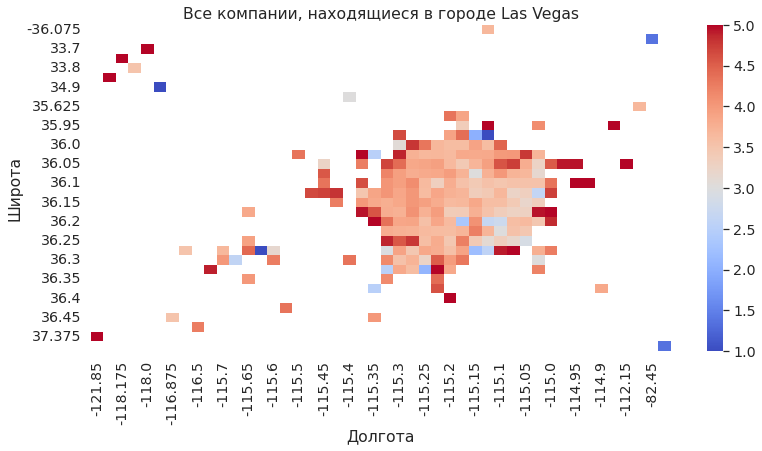

In [ ]:
new_array1= pd.pivot_table(new_array, index=['latitude'], columns=['longitude'], values='Средняя оценка компании', aggfunc=np.mean)

figure, ax = plt.subplots(figsize=(13,6))
sns.heatmap(new_array1, cmap='coolwarm', cbar=True, ax=ax)
ax.set_ylabel('Широта')
ax.set_xlabel('Долгота')
ax.set_title(f'Все компании, находящиеся в городе {big_bus_city}');

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Недостатоки могут быть существенными, потому что такой район может быть представлен только одной или несколькими компаниями, что не дает полной картины о качестве района. Недостаток с автоматической цветовой гаммой может быть существенным, потому что она может искажать относительные различия между районами, если минимальное и максимальное значения оценки сильно отличаются друг от друга.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

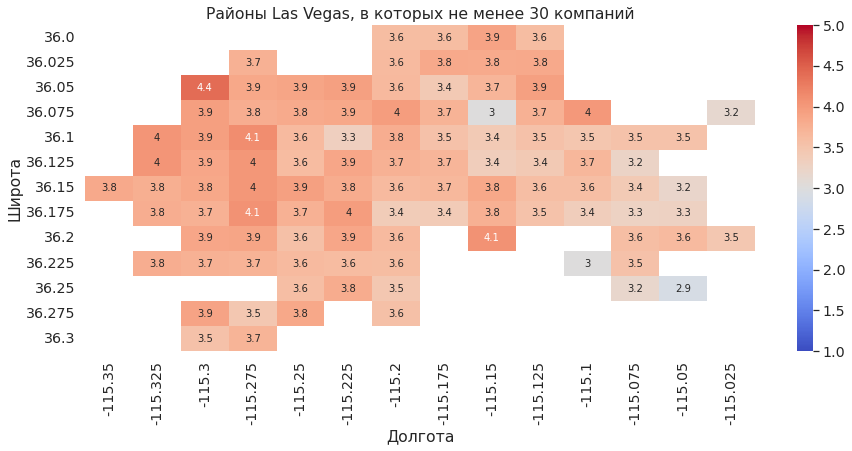

In [ ]:
company = new_array.groupby(['longitude', 'latitude']).filter(lambda x: len(x) >= 30)
company = pd.pivot_table(company, index=['latitude'], columns=['longitude'], values='Средняя оценка компании', aggfunc=np.mean)

vmin = new_array['Средняя оценка компании'].min()
vmax = new_array['Средняя оценка компании'].max()

figure, ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(company, vmin=vmin, vmax=vmax,  cmap='coolwarm', cbar=True, ax=ax, annot = True)
ax.set_ylabel('Широта')
ax.set_xlabel('Долгота')
ax.set_title(f'Районы {big_bus_city}, в которых не менее 30 компаний');

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Полученный график с учетом условия на минимальное количество компаний позволяет более точно оценить среднюю оценку компаний по районам, так как исключает районы с недостаточным количеством данных для получения достоверной информации. Также использование параметров vmin и vmax позволяет более корректно отображать цветовую шкалу, так как она теперь ограничена минимальным и максимальным значением оценок компаний. Тепеорь заметны зоны с высокими и низкими оценками, что может быть полезно при анализе.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
restaurant = new_array[new_array['categories'].apply(lambda x: 'restaurant' in x.lower())]


restaurant = restaurant[restaurant['Количество оценок'].apply(lambda x: x >= 5)]
restaurant

,latitude,longitude,categories,name,Средняя оценка компании,Количество оценок
business_id,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,36.075,-115.175,Nightlife;Bars;Barbeque;Sports Bars;American (...,"""Flight Deck Bar & Grill""",2.833333,6
n7V4cD-KqqE3OXk0irJTyA,36.075,-115.175,Arcades;Arts & Entertainment;Gastropubs;Restau...,"""GameWorks""",3.120000,150
Wpt0sFHcPtV5MO9He7yMKQ,36.125,-115.100,Restaurants;Fast Food;Burgers,"""McDonald's""",2.400000,10
W1Yr6c2XDx_RBjb6WsV-aQ,36.175,-115.200,Restaurants;Cafes;American (New);Bars;Nightlif...,"""Divine Cafe at the Springs Preserve""",4.088235,68
Uy3_5nLo3sYkAuSX6mjdmg,36.025,-115.175,Restaurants;American (Traditional),"""Geebee's Bar & Grill""",4.416667,12
...,...,...,...,...,...,...
Kbbm6Vd5UdbP10dwjBghRw,36.050,-115.200,Restaurants;Fast Food;Burgers,"""In-N-Out Burger""",4.176991,113
UpW3jyJ3_kTG7oDSflwnMA,36.125,-115.225,Restaurants;Thai,"""Archi's Thai Kitchen""",3.898305,177
e2ApirIzYID9xIye0r_gKQ,36.275,-115.275,Salad;Breakfast & Brunch;Sandwiches;Burgers;Re...,"""Farmer Boys""",2.826087,69


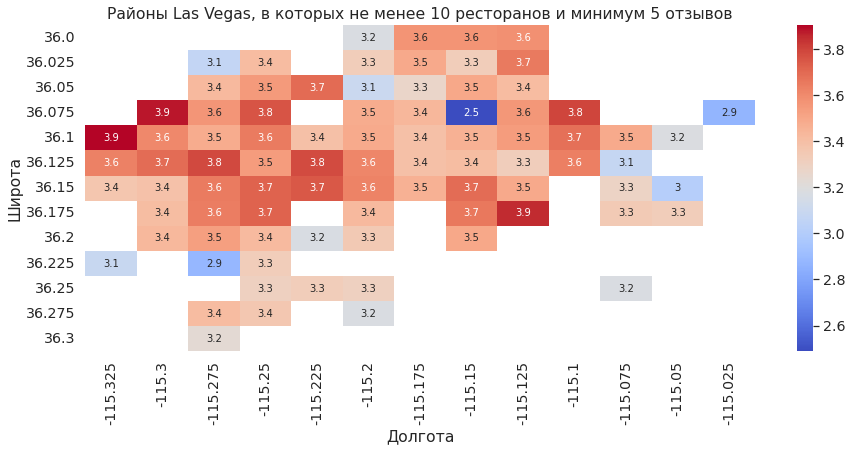

In [ ]:
restr_10 = restaurant.groupby(['longitude', 'latitude']).filter(lambda x: len(x) >= 10)
restr_10 = pd.pivot_table(restr_10, index=['latitude'], columns=['longitude'], values='Средняя оценка компании', aggfunc=np.mean)

figure, ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(restr_10, cmap='coolwarm', cbar=True, ax=ax, annot = True)
ax.set_ylabel('Широта')
ax.set_xlabel('Долгота')
ax.set_title(f'Районы {big_bus_city}, в которых не менее 10 ресторанов и минимум 5 отзывов');

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Может получиться такая ситуация, что по данным в районе один ресторан. Тогда средним будет единственная оценка за этот ресторан, что некорректно характеризует район. 
Та же самая ситуация с одним отзывом. Если он один или недостаточное количество, то нельзя обобщать этот результат.


Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
restaurant = new_array[new_array['categories'].apply(lambda x: 'restaurant' in x.lower())].reset_index()
restaurant = restaurant[restaurant['Количество оценок'].apply(lambda x: x >= 50)]
restaurant.sort_values(by=['Средняя оценка компании', 'Количество оценок'], ascending=False, inplace=True)
restaurant[['name', 'Средняя оценка компании', 'Количество оценок', 'longitude', 'latitude', 'categories']].head(10)

,name,Средняя оценка компании,Количество оценок,longitude,latitude,categories
772,"""Lip Smacking Foodie Tours""",4.931034,87,-115.175,36.125,Food Tours;Restaurants;Event Planning & Servic...
4160,"""Poppa Naps BBQ""",4.884615,52,-115.100,36.125,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
443,"""Brew Tea Bar""",4.859504,484,-115.250,36.050,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
5516,"""Niko's Pizza Las Vegas""",4.839286,56,-115.300,36.100,Mediterranean;Pizza;Italian;Food Delivery Serv...
3673,"""Aria Mediterranean Restaurant""",4.833333,66,-115.250,36.175,Middle Eastern;Persian/Iranian;Mediterranean;V...
5817,"""Le Petit Café & Bakery""",4.819672,61,-115.300,36.075,Bakeries;Restaurants;French;Food;Cafes;Themed ...
479,"""Meraki Greek Grill""",4.816993,153,-115.250,36.100,Restaurants;Greek
2650,"""Zenaida's Cafe""",4.816327,98,-115.100,36.100,Restaurants;Breakfast & Brunch;Cafes
2620,"""El Frescos Cocina Mexicana""",4.806818,88,-115.150,36.100,Caterers;Mexican;Restaurants;Food;Event Planni...
2936,"""Tacos Huevos""",4.793103,58,-115.150,36.150,Breakfast & Brunch;Mexican;Restaurants;Dessert...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
restaurant = new_array[new_array['categories'].apply(lambda x: 'restaurant' in x.lower())].reset_index()
restaurant = restaurant[restaurant['Количество оценок'].apply(lambda x: x >= 50)]
restaurant = restaurant[restaurant['Средняя оценка компании'].apply(lambda x: x >= 4.7)]


import plotly
import plotly.graph_objects as go
import plotly.express as px

top_10_restaurants = restaurant.iloc[:10]

fig = px.density_mapbox(
    restaurant,  # таблица с данными
    lat='latitude', lon='longitude',  # колонки с координатами
    radius=10,  # радиус влияния каждой точки
    mapbox_style="stamen-terrain"  # стиль карты
)

fig.add_trace(go.Scattermapbox(
        lat=top_10_restaurants['latitude'],
        lon=top_10_restaurants['longitude'],
        mode='markers',
        marker=dict(size=10, color='red'),
        text=top_10_restaurants['name'],
        name='Top 10 Restaurants'
))

plotly.offline.plot(fig, filename='restaurant_map.html', auto_open=False)

'restaurant_map.html'

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий требователен и ориентирован на качество.Он делает правильно, что выбирает рестораны, где отзывов минимум 50. Оценка за этот ресторан уже больше будет соответствовать правдеа (ЗБЧ выполняется, чем больше n, тем больше стремится к мат.ожиданию)
В данном городе(ЛА) есть 17 ресторанов, которые имеют больше 50 отзывов и среднее минимум 4.7. Так же из этих 17 ресторанов, 10 удоволетворяют желаниям кота Василия.